In [32]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [33]:

#read in the url and scrape ticker data
indx = 'SP500'
source_table_name = 'Data/'+indx+'.csv'
data_table = pd.read_csv(source_table_name)
# data_table = data_table.head(4)
# data_table

In [34]:
# ############################ run this once And save the results to a csv. Taked approx. 22 mins 
# ################### Comment after it has executed once. 
# # tickers = company_list
# tickers = data_table['Symbol'].str.strip()

# closing_prices_list = []
# for ticker in tickers:
#     try:
#         prices = pdr.DataReader(ticker,'yahoo','10/24/2019')
#         # print(prices)
#         prices = prices['Close']
#         prices = pd.DataFrame(prices)
#         # print(prices)
#         prices.columns = [ticker]
#         closing_prices_list.append(prices)
#         # print(closing_prices_list)
#     except:
#         pass
#     # print(closing_prices_list)
#     prices_df = pd.concat(closing_prices_list,axis=1)

# prices_df.sort_index(inplace=True)
# prices_df
# prices_df.to_csv("Data/"+indx+"_Close_prices_df.csv", index=True)

In [35]:
# the data gathered in the above dataframe and saved to csv file is being retrieved here
fromcsv = pd.read_csv("Data/"+indx+"_Close_prices_df.csv")
fromcsv=fromcsv.set_index('Date')
fromcsv

prices_df = fromcsv
prices_df.shape

(505, 503)

In [36]:
prices_df.columns

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [37]:
# prices_df.pct_change()

In [38]:
# prices_df.pct_change() # gets the precentage change across column leaving the first row NAN
# (prices_df.pct_change().sum()/len(prices_df)-1)*len(prices_df)
# this can be replaced by the following

In [39]:
# per_change = prices_df.diff().sum()
# per_change

In [40]:
# per_change/prices_df.iloc[0]

In [41]:
per_change = (prices_df.diff().sum())/prices_df.iloc[0]
per_change = per_change.to_frame()
per_change

,0
MMM,0.126259
ABT,0.554449
ABBV,0.415461
ABMD,0.971716
ACN,0.929405
...,...
YUM,0.153649
ZBRA,1.514829
ZBH,0.122699
ZION,0.387497


In [42]:
# per_change = prices_df.pct_change().mean()*len(prices_df)
# per_change = per_change.to_frame()
# per_change

In [43]:
# change for time intervel
# ((41.248280-27.372362)/27.372362)*100

In [44]:
# prices_df.pct_change()

In [45]:
per_change = per_change.rename(columns={0:'Returns'})
per_change

,Returns
MMM,0.126259
ABT,0.554449
ABBV,0.415461
ABMD,0.971716
ACN,0.929405
...,...
YUM,0.153649
ZBRA,1.514829
ZBH,0.122699
ZION,0.387497


In [46]:
prices_df['AAPL'].sum()/len(prices_df)

109.16297503178663

In [47]:
vol = prices_df.std()*len(prices_df)

In [48]:
# vol = (((prices_df - prices_df.mean())**2).sum())/len(prices_df)-1
# vol = vol.to_frame()
# vol.isna().sum()

In [49]:
# vol = np.sqrt(vol)
# vol

In [50]:
# prices_df.sum()/len(prices_df)


In [51]:
per_change['Volatility'] = vol
per_change

,Returns,Volatility
MMM,0.126259,9188.308133
ABT,0.554449,7655.954887
ABBV,0.415461,6259.337804
ABMD,0.971716,32870.744107
ACN,0.929405,25072.923856
...,...,...
YUM,0.153649,7618.510822
ZBRA,1.514829,64461.126359
ZBH,0.122699,8994.990354
ZION,0.387497,5519.340957


In [52]:

per_change = per_change.fillna(0)
per_change[per_change['Volatility'].isna()]

,Returns,Volatility


In [53]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
# returns = prices_df.pct_change().mean() * len(prices_df)
# returns = pd.DataFrame(returns)
# returns.columns = ['Returns']
# per_change['Volatility'] = prices_df.pct_change().std() * sqrt(len(prices_df))
# per_change

# Clusters with Unscaled Data

In [54]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(per_change)
    distortions.append(sum(np.min(cdist(per_change, km.cluster_centers_,
                                        'euclidean'), axis=1)) / per_change.shape[0])
    inertia.append(km.inertia_)

C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


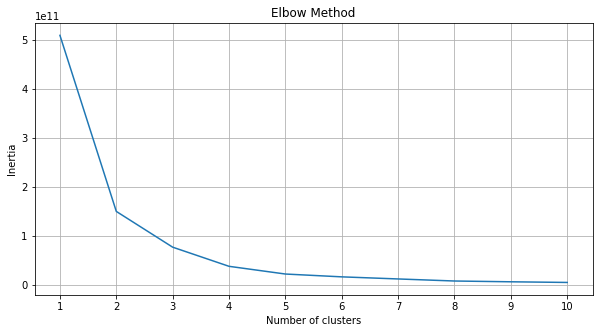

In [55]:
# Create the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
# plt.plot(df_elbow['k'], distortions, 'bx-')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

#### Looks like there or 4 or 5 clusters. Let's try scaling the data first

# Clusters with Scaled Data

In [56]:
stock_data_scaled = StandardScaler().fit_transform(per_change)
stock_data_scaled_df = pd.DataFrame(stock_data_scaled)
stock_data_scaled_df.shape
# stock_data_scaled

(503, 2)

In [57]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(stock_data_scaled)
    distortions.append(sum(np.min(cdist(stock_data_scaled, km.cluster_centers_,
                                        'euclidean'), axis=1)) / stock_data_scaled.shape[0])
    inertia.append(km.inertia_)

C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


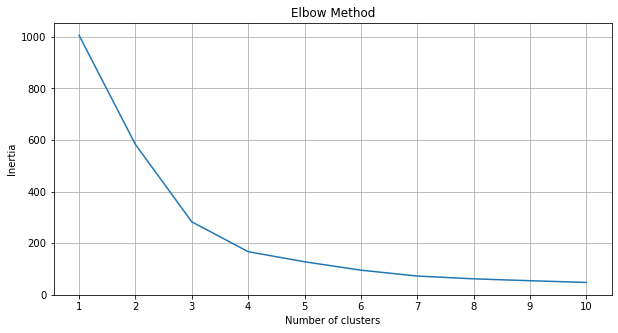

In [58]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
# plt.plot(df_elbow['k'], distortions, 'bx-')

plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

In [59]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(stock_data_scaled)

# Predict clusters
predictions = model.predict(stock_data_scaled)

In [60]:
# Add the predicted cluster column to the dataframe (name it class)
per_change["Cluster"] = model.labels_
per_change["Cluster"].unique()
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


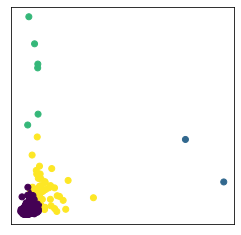

In [61]:
plt.figure(figsize=(4, 4))
plt.scatter(x=per_change['Returns'], y=per_change['Volatility'], c=per_change['Cluster'])

# plt.title('Clusters')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig("../static/Images/"+indx+"_clusters.png")
plt.show()

In [62]:
per_change = per_change.sort_values(by='Cluster')
per_change = per_change.reset_index()
per_change = per_change.rename(columns={'index':'Stock'})
per_change

,Stock,Returns,Volatility,Cluster
0,MMM,0.126259,9188.308133,0
1,NEM,0.492583,4565.955609,0
2,NWL,0.164267,2439.384285,0
3,NTAP,0.685663,8227.814344,0
4,NDAQ,0.990400,15429.216204,0
...,...,...,...,...
498,AZO,0.626809,107205.979148,3
499,MSFT,1.205945,23273.261454,3
500,CHTR,0.673478,49452.207025,3
501,BBWI,3.991725,9820.126895,3


In [63]:
file_path = "Data/Analyzed/"+indx+"_Clustered_Stocks.csv"
per_change.to_csv(file_path)

# PCA ??
As there were only 2 features , we do not require any dimenssionality reduction

#### uncomment the following cells if you want to check with PCA (Principal component analysis)

In [64]:
# # Initialize PCA model
# pca = PCA(n_components=0.90)
# stock_data_scaled_df
# stock_data_scaled_df
# # stock_data_scaled
# stock_data_scaled.shape
# stock_data_for_pca = pca.fit_transform(stock_data_scaled)
# stock_data_for_pca.shape
# # stock_data_for_pca
# plt.figure(figsize=(10, 5))
# plt.scatter(x=stock_data_for_pca[:,0], y=stock_data_for_pca[:,1], alpha=0.4)
# plt.title('Cryptocurrency clusters')
# plt.show()

In [65]:
# distortions = []
# inertia = []
# k = range(1, 11)
# # Calculate the inertia for the range of k values
# for i in k:
#     km = KMeans(n_clusters=i, random_state=0)
#     km.fit(stock_data_for_pca)
#     distortions.append(sum(np.min(cdist(stock_data_for_pca, km.cluster_centers_,
#                                         'euclidean'), axis=1)) / stock_data_for_pca.shape[0])
#     inertia.append(km.inertia_)
# # # Add the predicted cluster column to the dataframe (name it class)
# # per_change["Cluster"] = model.labels_
# # per_change["Cluster"].unique()
# # centroids = model.cluster_centers_
# # centroids_x = centroids[:,0]
# # centroids_y = centroids[:,1]
# # Predicting clusters with k=4


In [66]:

# # Initialize the k-means model
# model = KMeans(n_clusters=4, random_state=0)

# # Fit the model
# model.fit(stock_data_for_pca)

# # Predict clusters
# predictions = model.predict(stock_data_for_pca)
# plt.figure(figsize=(8, 4))
# plt.scatter(x=stock_data_for_pca[:,0], y=stock_data_for_pca[:,1], c=model.labels_)
# plt.title('Stock Clusters')
# plt.show()